<a href="https://colab.research.google.com/github/MatteoOnger/NIAC_Project/blob/dev/NIAC_PMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NIAC Project: Pacman Maze Solver**

*   **Authors:** Stefano Capelli, Matteo Onger
*   **Date:** March 2025

**Documentation**:
*   Gymnasium: [website](https://gymnasium.farama.org/)
*   Scallop & Scallopy: [paper](https://www.researchgate.net/publication/369945806_Scallop_A_Language_for_Neurosymbolic_Programming), [repository](https://github.com/scallop-lang/scallop), [website](https://www.scallop-lang.org/)
*   Pacman Maze game: [description](https://www.scallop-lang.org/ssnp24/index.html#section-17:~:text=2%3A%20PacMan%20Agent-,In,-this%20part%2C%20we)

**Notes**:
*   ...

In [ ]:
# download project repository
!git clone -b dev https://github.com/MatteoOnger/NIAC_Project.git

# download Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh

# download Scallopy 0.2.4 (Python 3.10)
!wget https://github.com/scallop-lang/scallop/releases/download/0.2.4/scallopy-0.2.4-cp310-cp310-manylinux_2_27_x86_64.whl

In [ ]:
# install Miniconda
%env PYTHONPATH=

!chmod +x /content/Miniconda3-py311_25.1.1-2-Linux-x86_64.sh
!bash Miniconda3-py311_25.1.1-2-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

In [ ]:
# force creation of the virtual environment 'niac'
!conda env remove -n niac -y || true
!conda env create -f /content/NIAC_Project/environment.yaml -y
!conda env list

---
## Installation check

In [4]:
# hello world in Scallopy 0.2.4
%%bash
source activate niac
python3

import sys
print(f"-----\nCurrent Python version: {sys.version}\n-----")

import scallopy
ctx = scallopy.ScallopContext()

ctx.add_relation("hello", str)
ctx.add_facts("hello", [("Hello World",)])
ctx.run()

print(list(ctx.relation("hello")))
quit()

-----
Current Python version: 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:16:10) [GCC 13.3.0]
-----
[('Hello World',)]


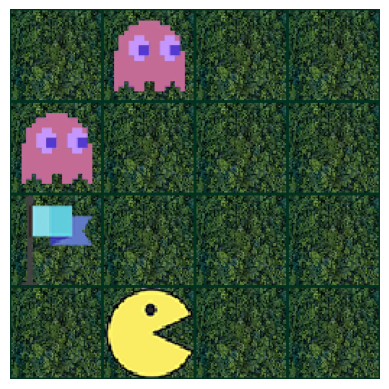

Tot reward:-1.0


In [5]:
# random agent plays pacman maze
import matplotlib.pyplot as plt
import numpy as np
import time

from IPython.display import clear_output
from NIAC_Project.pacman.arena import AvoidingArena

env = AvoidingArena(render_mode="rgb_array", grid_dim=(4,4), num_enemies=3)
env.reset()

counter = 0
tot_reward = 0
end_episode = False

while not end_episode:
    action = np.random.randint(0, 4)
    observation, reward, terminated, truncated, info = env.step(action)
    tot_reward += reward


    clear_output(wait=True)
    plt.imshow(env.render())
    plt.axis('off')
    plt.show()
    time.sleep(.1)

    end_episode = terminated or truncated or (counter > 10)
    counter += 1

env.close()
print(f"Tot reward:{tot_reward}")

---
## .......

In [6]:
%%bash
source activate niac
python3

import logging
import scallopy
import torch

from NIAC_Project.agents.agent import Agent


logging.basicConfig(format='%(asctime)s | %(levelname)s | %(name)s:%(funcName)s - %(message)s', force=True)
for name in logging.root.manager.loggerDict:
        if name.startswith('NIAC_Project'):
            logging.getLogger(name).setLevel(logging.DEBUG)

X, Y = 3, 3

agent_p = torch.zeros((X,Y))
target_p = torch.zeros((X,Y))
enemy_p = torch.zeros((X,Y))

agent_p[0,0] = 1.0
target_p[2,2] = 1.0
enemy_p[1,0], enemy_p[1,1] = 1.0, 0.6

agent = Agent(X, Y)
res = agent._logical_comp(agent_p, target_p, enemy_p)

print(f"Next move: {res}")
quit()

Next move: Actions.UP


2025-03-31 08:56:45,910 | DEBUG | NIAC_Project.agents.agent:_logical_comp - positions:
 - agent -> (0, 0) with prob. 1.0
 - target -> (2, 2) with prob. 1.0
 - enemies -> [(1, 0), (1, 1)] with prob. [1.0, 0.6000000238418579]
2025-03-31 08:56:45,910 | INFO | NIAC_Project.agents.agent:_logical_comp - next action: {'RIGHT': 0.0, 'UP': 0.59, 'LEFT': 0.0, 'DOWN': 0.0}
